# Projet 5: Segmentez les comportements clients - Analyse exploratoire

## Introduction

Nous nous intéressons dans ce projet à un dataset qui recensent des achats fait sur un site internet. Notre objectif sera de différencier les utilisateurs en fonction de leurs comportements dans le but de faire une approche plus ciblée.

Nous allons tout d'abord explorer nos données et essayer par la suite de créer une base de données qui nous permettra de bien différencier les utilisateurs.

## Le dataset

In [142]:
import pandas as pd
df = pd.read_excel("Online Retail.xlsx")

In [143]:
df.shape

(541909, 8)

Nous avons donc 541 909 achats présents dans notre dataset. Regardons les variables explicatives de ces achats.

In [144]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Combien y a-t-il d'utilisateurs dans cette bases de données?

In [145]:
import numpy as np
np.unique(df[['CustomerID']].values).shape

(139452,)

On remarque également qu'il y a beaucoup d'utilisateurs qui n'ont pas d'ifentifiants et on décide de les supprimer de la base.

In [146]:
df = df[~df[['CustomerID']].isnull().values]

In [147]:
df.shape

(406829, 8)

## Fréquence

On a donc des utilisateurs qui appairaissent des multiples fois dans nos données. On verra par la suite qui sont ces utilisateurs. On peut tout de suite observer le nombre d'achats par utilisateurs.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249B400E0B8>]], dtype=object)

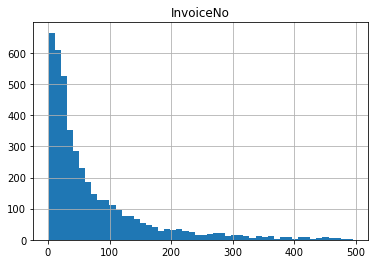

In [148]:
%matplotlib inline

frequency = df.groupby('CustomerID').agg({'InvoiceNo': lambda x: len(x)})
frequency = frequency[frequency.values < 500]
frequency.hist(bins = 50)

On voit ici la distribution de la fréquence à laquelle revienne les utilisateurs faire des achats sur le site. A noter que certains des utilisateurs ont été supprimés pour plus de visibiltés: en effet, les utilisateurs avec plus de 500 achats ne représentent qu'une faible portion des utilisateurs. On peut noter la fréquence maximale qui est très élevés. 

In [149]:
frequency = df.groupby('CustomerID').agg({'InvoiceNo': lambda x: len(x)})
frequency.max()

InvoiceNo    7983
dtype: int64

## Argent dépensé

On peut également regarder quelles sont les montants dess transactions.

In [150]:
df[['UnitPrice']].describe()

,UnitPrice
count,406829.000000
mean,3.460471
std,69.315162
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,38970.000000


On remarque l'existence de prix négatifs. Nous allons supprimés de notre base de données.

In [151]:
df = df[df[['UnitPrice']].values > 0]

In [152]:
df[['UnitPrice']].describe()

,UnitPrice
count,406789.000000
mean,3.460811
std,69.318561
min,0.001000
25%,1.250000
50%,1.950000
75%,3.750000
max,38970.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249ACB37E10>]], dtype=object)

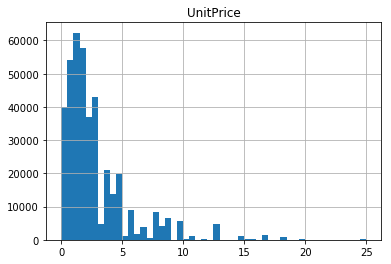

In [153]:
df[['UnitPrice']][df[['UnitPrice']].values < 25].hist(bins = 50)

on voit beaucoup de petis achats c'est à dire des items qui ne valent pas chères à l'unités. Il est intéressant également de vor le prix total de ce que les utilisateurs achètent sur le site. Pour cel, on crée la variable "prix total".

In [154]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [155]:
df['TotalPrice'].describe()

count    406789.000000
mean         20.403860
std         427.612692
min     -168469.600000
25%           4.200000
50%          11.100000
75%          19.500000
max      168469.600000
Name: TotalPrice, dtype: float64

On voit un minimum négatif donc il ya dans notre base de données des quantités négatives que nous allons supprimer.

In [156]:
df = df[df[['Quantity']].values > 0]

In [157]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['TotalPrice'].describe()

count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalPrice, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249B2B7F1D0>]], dtype=object)

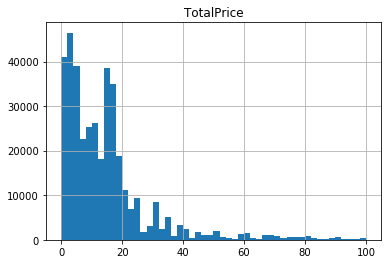

In [158]:
df[['TotalPrice']][df[['TotalPrice']].values < 100].hist(bins = 50)

Encore une fois, on a supprimés les outliers. On voit une distribution plus étalés au niveau des prix. Cependant, on voit quand même que les achats sont principalement à faiblke prix: majoritairement entre 0 et 20 unités de prix.

## Période des achats

Nous allons observer à quelle période corresponde les achats. 

In [159]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [160]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

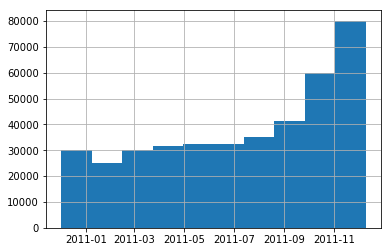

In [161]:
df['InvoiceDate'].hist()

(On remarque que les achats que les commandes augmentent en fin d'année).

## Pays d'achats

On va observer de quelles provenances sont les utilisateurs qui commandent sur ce site.

In [162]:
 len(df['Country'].unique())

37

Il y a 38 pays différents dans notre dataset. On peut remarquer une distribution assez particulière:

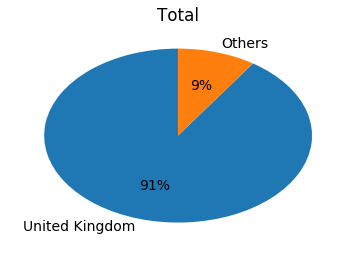

In [163]:
import matplotlib.pyplot as plt
plt.rc('font', weight='normal', size=14)
nbUK = df[df.Country=='United Kingdom'].CustomerID.sum()
nbOthers = df[df.Country!='United Kingdom'].CustomerID.sum()
plt.pie([nbUK, nbOthers], labels=['United Kingdom', 'Others'], autopct = lambda x:'{:1.0f}%'.format(x), startangle=90)
ax.axis('equal')
plt.title('Total')
plt.show()

91% des utilisateurs viennent de Grande-Bretagne. Pour simplifier nos données nous allons considérer les utilisateurs qui viennent de Grande-Bretagne et les autres.

In [164]:
import numpy as np
df[['Country']] = df[['Country']].fillna('')
df[['Country']] = np.array(df[['Country']].values == 'United Kingdom').astype(int)

In [165]:
df.rename(columns={'Country': 'isUnitedKingdom'}, inplace=True)

Maintenant que nous avons observé notre dataset, nous allons le préparer pour pouvoir par la suite différencier nos utilisateurs.

## Préparation des données

### Valeurs abberantes

Nous avons déjà traiter les données abberantes aux niveux des prix et des quantités. Nous voulons également traiter les doublons.

In [166]:
df=df.drop_duplicates()

In [167]:
df.shape

(392692, 9)

### RFM Table

Nous allons transformer nos données en créant une table rfm (recency, frequency, monetary value):
- recency: le nombre de jours depuis le dernier achat
- frequency: le nombre de fois où l'utilisateur est revenu
- monetary value: l'argent dépensé sur le site

In [168]:
import datetime as dt
NOW = dt.datetime(2011,12,10)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

recency = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (NOW - x.max()).days
        })
recency['InvoiceDate'] = recency['InvoiceDate'].astype(int)
recency.rename(columns={'InvoiceDate': 'recency'}, 
               inplace = True)

frequency = df.groupby('CustomerID').agg({'InvoiceNo': lambda x: len(x)})
frequency.rename(columns={'InvoiceNo': 'frequency'}, 
                 inplace = True)

monetary_value = df.groupby('CustomerID').agg({'TotalPrice': lambda x: x.sum()})
monetary_value.rename(columns={'TotalPrice': 'monetary_value'}, 
                      inplace=True)

Il ne faut pas oublier la requête princiapl de notre amployeur qui est de classifier les utilisateurs le plus rapidement possible. Comme les variables recency et frequency s'inscrivent dans le temps et ne convergent jamais, on ne va pas les utilisés pour classifier nos utilisateurs.

Nous allons ajouter d'autres variables à celles-ci. Il serait donc intéressant de créer des variables qui vont nous permettre de classifier les utilisateurs dans ce sens.

Nous créons donc les variables suivantes:
- mean monetary value: l'argent dépensé moyen par achat
- mean period between 2 purchases: la période moyenne entre deux achats
- mean quantity: la moyenne de la quantité 
- mean unit price: la moyenne du prix unitaire

In [ ]:
#monetary value spent on the site
monetary_value = df.groupby('CustomerID').agg({'TotalPrice': lambda x: x.sum()})
monetary_value.rename(columns={'TotalPrice': 'monetary_value'}, 
                      inplace=True)

#mean of total price
mean_monetary_value = df.groupby('CustomerID').agg({
        'TotalPrice': lambda x : x.sum()/len(x)
        })
mean_monetary_value.rename(columns={'TotalPrice': 'mean_monetary_value'}, 
                           inplace=True)

#mean period between two purchases
mean_period_bt_2 = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (x.max() - x.min()).days/len(x)
        })
mean_period_bt_2.rename(columns={'InvoiceDate': 'mean_period_bt_2'},
                        inplace=True)

#period in days since the first purchase
period_on_the_site = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (NOW - x.min()).days
        })
period_on_the_site.rename(columns={'InvoiceDate': 'period_on_the_site'},
                          inplace=True)

#monetary value on the site by day
a = monetary_value.values
b = period_on_the_site.values
monetary_value_onsite = pd.DataFrame(np.divide(a, b, out=np.zeros_like(a), where=b!=0), index = monetary_value.index, columns = ['monetary_value_on_site'])

#isUnitedKingdom: is user from united kingdom
isUnitedKingdom = df.groupby('CustomerID').agg({'isUnitedKingdom': lambda x: sum(x)/len(x)})

#frequency: number of times the user bought something on the site
mean_quantity = df.groupby('CustomerID').agg({'Quantity': lambda x: x.mean()})
mean_quantity.rename(columns={'Quantity': 'mean_quantity'}, 
                 inplace = True)

#frequency: number of times the user bought something on the site
mean_unit_price = df.groupby('CustomerID').agg({'UnitPrice': lambda x: x.mean()})
mean_unit_price.rename(columns={'UnitPrice': 'mean_unit_price'}, 
                 inplace = True)

On crée notre table et on la sauvegarde.

In [170]:
data = pd.concat([monetary_value, mean_monetary_value, mean_period_bt_2, monetary_value_onsite, mean_quantity, mean_unit_price, isUnitedKingdom], axis = 1)
data.to_csv('data.csv')

## Conclusion

Nous avons observer les données de notre dataset et avons préparer les données sous la forme d'une table qui nous permet de connaitre certaines informations par individus. Nous voulons classer les utilisateurs dès leurs premiers achats. Nous voulons donc que notre algorithme de classification converge rapidement vers un taux d'erreur nul (ou quasi nul en fonction de l'efficacité de l'algorithme lui-même). Nous allons donc maintenant essayer de mettre cette algorithme en place.